In [ ]:
#Bootstraping with Starcraft
#step 0 : get your data
#step 1 : make a bunch of copies ( aka sample with replcament)
#step 2: calcuate your stat each copy 
#step 3: profit !! Calauate whatever bootstrap stat you need

In [2]:
import pandas as pd

In [4]:
#step 3: 95% CI for sample mean of action per minute in starcraft dataset
file = 'https://raw.git.generalassemb.ly/DSI-Misk-II/resource-datasets/master/starcraft/SkillCraft1_Dataset.csv?token=AABEAEq3kg5Zku7Xuxx33kbLfRRkcJ-vks5cIHRXwA%3D%3D'
star = pd.read_csv(file)

In [5]:
star.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [10]:
#step 0: get the data
apm = star.APM

In [11]:
apm.head()

0    143.7180
1    129.2322
2     69.9612
3    107.6016
4    122.8908
Name: APM, dtype: float64

In [12]:
#step 1: make a bunch
import numpy as np

In [17]:
np.random.choice(apm, size=len(apm))

117.5236467923417

In [18]:
print(np.mean(apm), np.mean(np.random.choice(apm, size=len(apm))))

117.04694709278338 118.13800561413844


In [20]:
#step 2: calcuate your statistics each copy 
bootstraps_mean = [np.mean(np.random.choice(apm, size=len(apm))) for _ in range(1000)]

In [21]:
bootstraps_mean

[115.71002225036818,
 117.71292281001473,
 116.21664176730486,
 115.38353565243006,
 117.83845362592047,
 118.52350716936672,
 116.5604917820324,
 116.02644542562592,
 117.8409778851252,
 114.74376551399116,
 117.91749389690722,
 115.90817492783505,
 116.53235572312224,
 116.19238506627391,
 116.32261097496317,
 117.29353493372606,
 118.02050688070693,
 116.67107441531664,
 117.56532853608246,
 118.99297028571429,
 116.16775120471281,
 117.79162202650957,
 116.14006860088365,
 118.67188227393224,
 116.16488691605302,
 116.6892326597938,
 118.70993082768778,
 117.22827131664212,
 117.68752022385861,
 116.71090167304861,
 115.78613153460971,
 116.95138974963182,
 116.97501545213551,
 118.33179858026509,
 116.96427630044182,
 116.96333114580267,
 117.5525797820324,
 116.00288021796759,
 118.72970937260678,
 117.01364673932254,
 116.3407194521355,
 116.23742096023564,
 118.07533882179675,
 116.43243248306332,
 115.70935572901327,
 118.44562002945509,
 117.02174212665685,
 116.8393657908689

In [22]:
#step 3: find the 95% CI
from scipy.stats import scoreatpercentile
lower = scoreatpercentile(bootstraps_mean, 2.5)
upper = scoreatpercentile(bootstraps_mean, 97.5)
lower, upper 

(115.3090473053019, 118.74130253019145)

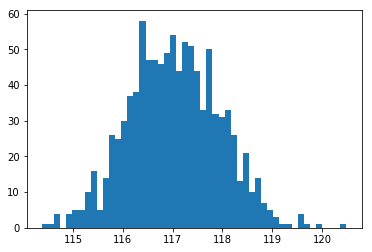

In [24]:
import matplotlib.pyplot as plt
plt.hist(bootstraps_mean, bins=50);

In [27]:
#just checkinh we are sane with starts
from scipy import stats
n_dst = stats.norm()

In [34]:
# Z score 
low_z = n_dst.ppf(0.025)
high_z = n_dst.ppf(0.975)

In [31]:
#std
std = np.std(apm)

In [32]:
#mean
mean = np.mean(apm)

In [36]:
sqrtn = np.sqrt(len(apm))

In [37]:
lower1 = mean + low_z * std / sqrtn

In [38]:
higher1 = mean + high_z * std / sqrtn

In [40]:
lower1, higher1

(115.29987665595061, 118.79401752961616)